In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# відключити попередження Anaconda
import warnings
warnings.simplefilter('ignore')

In [3]:
# встановимо, що в цислах типу float виводити 2 знаки після роздільника
pd.options.display.float_format = '{:.2f}'.format

In [6]:
data = pd.read_csv('survey.csv')
data

,MainBranch,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,Gender,JobSat,JobSeek,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,I am a developer by profession,nan,13,nan,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Man,Slightly satisfied,I am not interested in new job opportunities,...,False,False,False,False,False,False,False,False,False,False
1,I am a developer by profession,nan,19,nan,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Very dissatisfied,I am not interested in new job opportunities,...,False,False,False,False,False,False,False,False,False,False
2,I code primarily as a hobby,nan,15,nan,Russian Federation,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


### Опис колонок  
MainBranch - розробник/ пишу код у вільний від роботи час  
**Age** - вік  
**Age1stCode** - у якому віці написали перший код  
**ConvertedComp** - заробітна плата (у $)  
Country - країна проживання  
EdLevel - рівень освіти  
Employment - поточний вид зайнятості  
Gender - стать  
JobSat - оцінка рівня задоволенності роботою  
JobSeek - чи знаходитесь ви у пошуку роботи зараз  
NEWLearn - як часто ви вивчаєте нову мову програмування  
NEWOvertime - як часто ви працюєте понаднормово  
OpSys - яку операційну систему використовуєте  
SOAccount - наявність акаунту на Stack Overflow  
SOComm - чи вважаєте ви себе частиною спільноти Stack Overflow  
SOPartFreq - як часто ви берете участь в обговореннях на Stack Overflow  
SOVisitFreq - як часто ви відвідуєте Stack Overflow  
SurveyEase - наскільки простим було опитування  
SurveyLength - наскільки довгим було опитування  
UndergradMajor - галузь знань, за якою ви здобули освіту  
WelcomeChange - наскільки привітною є спільнота користувачів на Stack Overflow  
**WorkWeekHrs** - кількість робочих годин на тиждень  
**YearsCode** - скільки років займаєтесь написанням коду  
**YearsCodePro** - скільки років професійно займаєтесь написанням коду  
'C#' - 'Assembly' - з якою мовою програмування ви працювали протягом року

## 1. Підготовка та очищення даних

In [7]:
data.columns

Index(['MainBranch', 'Age', 'Age1stCode', 'ConvertedComp', 'Country',
       'EdLevel', 'Employment', 'Gender', 'JobSat', 'JobSeek', 'NEWLearn',
       'NEWOvertime', 'OpSys', 'SOAccount', 'SOComm', 'SOPartFreq',
       'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'UndergradMajor',
       'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro', 'C#',
       'HTML/CSS', 'JavaScript', 'Swift', 'Objective-C', 'Python', 'Ruby',
       'SQL', 'Java', 'PHP', 'C', 'TypeScript', 'Bash/Shell/PowerShell',
       'Kotlin', 'R', 'VBA', 'Perl', 'Scala', 'C++', 'Go', 'Haskell', 'Rust',
       'Dart', 'Julia', 'Assembly'],
      dtype='object')

### 1.1 Видалення зайвих стовпчиків  
**df.drop([list of columns], axis=1)**

In [8]:
data.drop(['SurveyEase', 'SurveyLength', 'WelcomeChange'], axis=1, inplace=True)

### 1.2 Видалення рядків із пропусками
**df.dropna()** - видалити всі рядки, в яких є пропуски

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MainBranch             64162 non-null  object 
 1   Age                    45446 non-null  float64
 2   Age1stCode             57900 non-null  object 
 3   ConvertedComp          34756 non-null  float64
 4   Country                64072 non-null  object 
 5   EdLevel                57431 non-null  object 
 6   Employment             63854 non-null  object 
 7   Gender                 50557 non-null  object 
 8   JobSat                 45194 non-null  object 
 9   JobSeek                51727 non-null  object 
 10  NEWLearn               56156 non-null  object 
 11  NEWOvertime            43231 non-null  object 
 12  OpSys                  56228 non-null  object 
 13  SOAccount              56805 non-null  object 
 14  SOComm                 56476 non-null  object 
 15  SO

In [10]:
data.dropna(inplace=True)
data.head()

,MainBranch,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,Gender,JobSat,JobSeek,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
7,I am a developer by profession,36.00,12,116000.00,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",...,False,False,False,False,False,False,False,False,False,False
9,I am a developer by profession,22.00,14,32315.00,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Man,Very satisfied,"I’m not actively looking, but I am open to new...",...,False,False,False,False,False,False,False,False,False,False
10,I am a developer by profession,23.00,13,40070.00,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,Slightly dissatisfied,I am actively looking for a job,...,False,False,False,False,False,False,False,False,False,False
11,I am a developer by profession,49.00,42,14268.00,Spain,Some college/university study without earning ...,Employed full-time,Man,Very dissatisfied,"I’m not actively looking, but I am open to new...",...,False,False,False,False,False,False,False,False,False,False
13,I am a developer by profession,27.00,13,66000.00,United States,"Associate degree (A.A., A.S., etc.)",Employed full-time,Man,Slightly satisfied,"I’m not actively looking, but I am open to new...",...,False,False,False,False,False,False,False,False,False,False


### 1.3 Зміна типу даних в колонках з текстового на числовий (за потреби)  
**df[name of column] = pd.to_numeric(df[name of column], errors='coerce')**  
errors='coerce' - якщо в комірці неможливо конвертувати в числовий тип, то така комірка стає NaN

In [11]:
data['Age1stCode'] = pd.to_numeric(data['Age1stCode'], errors='coerce')
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22084 entries, 7 to 63517
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MainBranch             22084 non-null  object 
 1   Age                    22084 non-null  float64
 2   Age1stCode             21989 non-null  float64
 3   ConvertedComp          22084 non-null  float64
 4   Country                22084 non-null  object 
 5   EdLevel                22084 non-null  object 
 6   Employment             22084 non-null  object 
 7   Gender                 22084 non-null  object 
 8   JobSat                 22084 non-null  object 
 9   JobSeek                22084 non-null  object 
 10  NEWLearn               22084 non-null  object 
 11  NEWOvertime            22084 non-null  object 
 12  OpSys                  22084 non-null  object 
 13  SOAccount              22084 non-null  object 
 14  SOComm                 22084 non-null  object 
 15  SO

In [13]:
data.dropna(inplace=True)

In [14]:
data.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,21241.00,21241.00,21241.00,21241.00,21241.00,21241.00
mean,32.53,14.90,103899.88,40.77,14.97,8.98
std,8.24,4.47,217298.93,15.96,9.06,7.33
min,1.00,5.00,0.00,1.00,1.00,1.00
25%,27.00,12.00,27250.00,40.00,8.00,4.00
50%,31.00,15.00,56788.00,40.00,13.00,7.00
75%,37.00,18.00,99530.00,42.50,20.00,12.00
max,279.00,50.00,2000000.00,425.00,50.00,48.00


## 2. Виявлення та виключення викидів з даних  
### 2.1 Числові ознаки

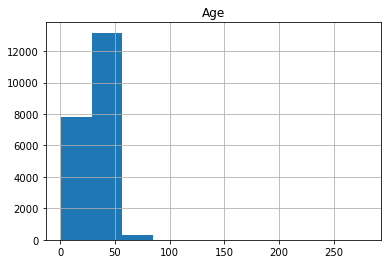

In [15]:
data[['Age']].hist();

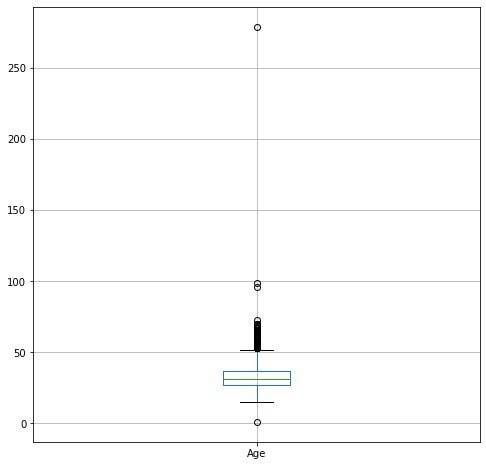

In [17]:
data[['Age']].boxplot(figsize=(8, 8));

In [18]:
data.drop(data[data['Age'] < 15].index, inplace=True)
data.drop(data[data['Age'] > 55].index, inplace=True)

### 2.2 Категоріальні ознаки

In [19]:
print(data[['Gender']].nunique())
print(data[['Gender']].value_counts())

Gender    7
dtype: int64
Gender                                                     
Man                                                            19443
Woman                                                           1243
Non-binary, genderqueer, or gender non-conforming                124
Man;Non-binary, genderqueer, or gender non-conforming             52
Woman;Non-binary, genderqueer, or gender non-conforming           27
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        4
dtype: int64


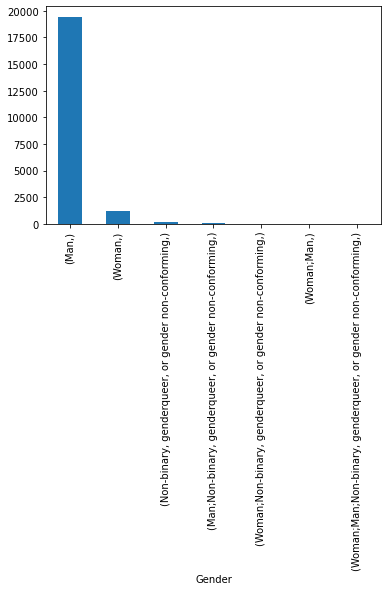

In [20]:
data[['Gender']].value_counts().plot.bar();

In [21]:
data.drop((data[data['Gender'] == 'Non-binary, genderqueer, or gender non-conforming'].index) |
          (data[data['Gender'] == 'Man;Non-binary, genderqueer, or gender non-conforming'].index) |
          (data[data['Gender'] == 'Woman;Non-binary, genderqueer, or gender non-conforming'].index) |
          (data[data['Gender'] == 'Woman;Man'].index) |
          (data[data['Gender'] == 'Woman;Man;Non-binary, genderqueer, or gender non-conforming'].index), inplace=True )

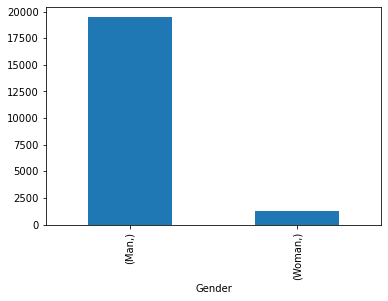

In [22]:
data[['Gender']].value_counts().plot.bar();

після очищення даних датафрейм варто перезаписати  

## Розвідковий аналіз даних

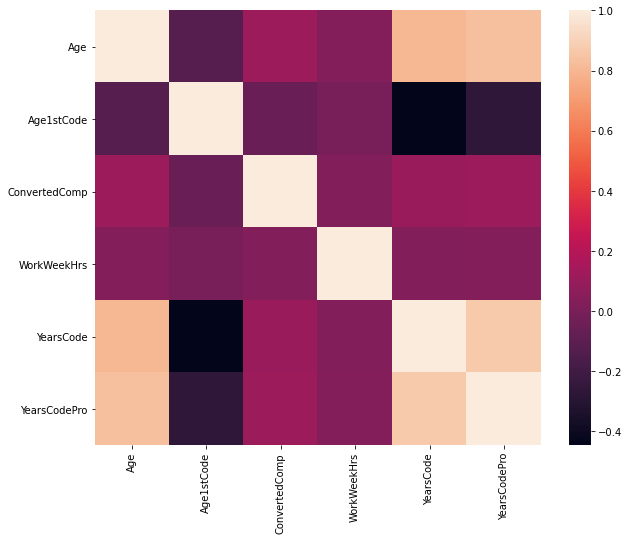

In [23]:
plt.figure(figsize=(10,8));
sns.heatmap(data[['Age', 'Age1stCode', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']].corr());

MainBranch    2
dtype: int64
MainBranch                                                                   
I am a developer by profession                                                   19040
I am not primarily a developer, but I write code sometimes as part of my work     1646
dtype: int64


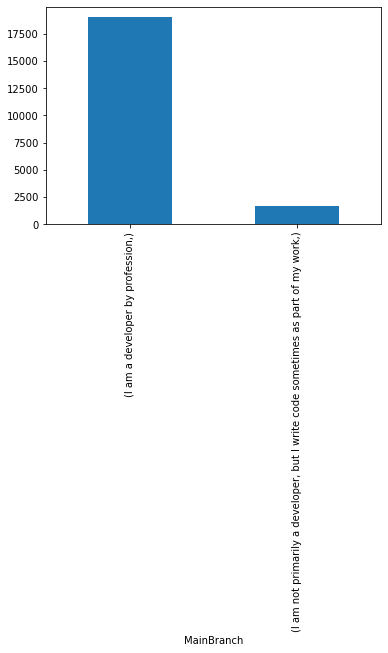

In [24]:
print(data[['MainBranch']].nunique())
print(data[['MainBranch']].value_counts())
data[['MainBranch']].value_counts().plot.bar();

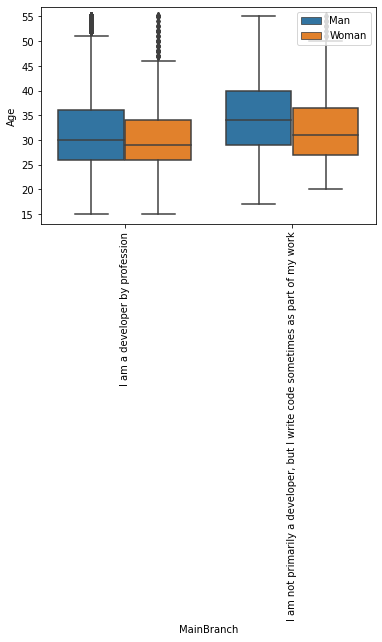

In [25]:
sns.boxplot(data['MainBranch'], data['Age'], hue=data['Gender']);
plt.xticks(rotation=90); 
plt.legend(loc=1);

In [26]:
data['Country'].nunique()

147

In [28]:
data['Country'].value_counts()

United States     4771
India             1594
United Kingdom    1477
Germany           1360
Canada             765
                  ... 
Niger                1
Turkmenistan         1
Haiti                1
Bahamas              1
Lesotho              1
Name: Country, Length: 147, dtype: int64

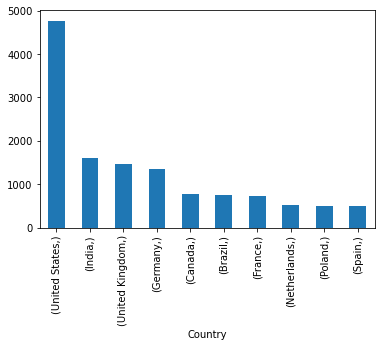

In [29]:
data[['Country']].value_counts().head(10).plot.bar();

In [30]:
data['EdLevel'].nunique()

6

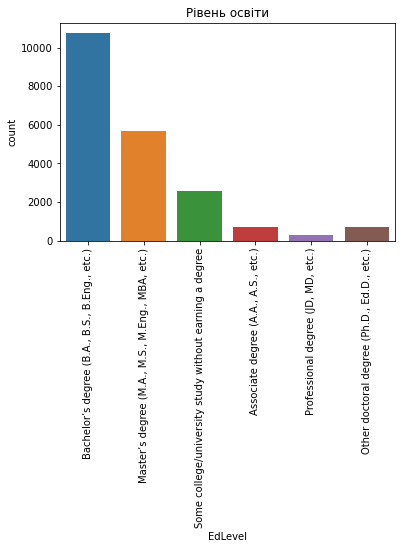

In [40]:
sns.countplot(data['EdLevel']);
plt.title('Рівень освіти');
plt.xticks(rotation=90); 

In [33]:
data.groupby(['EdLevel'])['Age', 'Age1stCode', 'ConvertedComp'].mean()

,Age,Age1stCode,ConvertedComp
EdLevel,,,
"Associate degree (A.A., A.S., etc.)",31.72,15.06,106625.85
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",30.97,15.17,105476.58
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",33.38,14.69,102445.67
"Other doctoral degree (Ph.D., Ed.D., etc.)",37.17,13.84,123443.97
"Professional degree (JD, MD, etc.)",33.66,15.35,61993.06
Some college/university study without earning a degree,32.47,14.09,95466.93


In [34]:
data.columns

Index(['MainBranch', 'Age', 'Age1stCode', 'ConvertedComp', 'Country',
       'EdLevel', 'Employment', 'Gender', 'JobSat', 'JobSeek', 'NEWLearn',
       'NEWOvertime', 'OpSys', 'SOAccount', 'SOComm', 'SOPartFreq',
       'SOVisitFreq', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode',
       'YearsCodePro', 'C#', 'HTML/CSS', 'JavaScript', 'Swift', 'Objective-C',
       'Python', 'Ruby', 'SQL', 'Java', 'PHP', 'C', 'TypeScript',
       'Bash/Shell/PowerShell', 'Kotlin', 'R', 'VBA', 'Perl', 'Scala', 'C++',
       'Go', 'Haskell', 'Rust', 'Dart', 'Julia', 'Assembly'],
      dtype='object')

In [35]:
data_languages = data.loc[:, 'C#':'Assembly']
data_languages

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
7,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,True,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62054,False,True,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
62212,True,True,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
63083,False,True,True,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
63402,True,True,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
languages = data_languages.sum().sort_values(ascending = False)
languages

JavaScript               14593
HTML/CSS                 12810
SQL                      11925
Python                    8536
Bash/Shell/PowerShell     7737
Java                      7686
C#                        6827
TypeScript                6389
PHP                       4901
C++                       3670
C                         3056
Go                        2039
Kotlin                    1773
Ruby                      1704
Swift                     1280
VBA                       1132
R                         1072
Objective-C                918
Scala                      896
Rust                       882
Assembly                   739
Dart                       704
Perl                       609
Haskell                    307
Julia                      128
dtype: int64

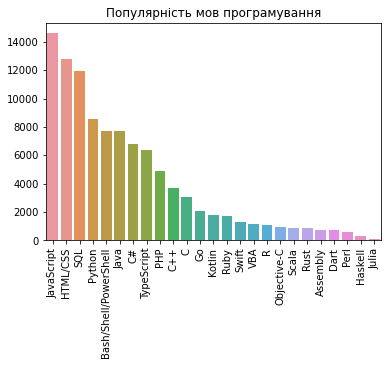

In [37]:
sns.barplot(x=languages.index, y=languages);
plt.title('Популярність мов програмування');
plt.xticks(rotation=90);

## Завдання  
1. Провести аналіз числових ознак на наявність викидів, за потреби видалити викиди  
2. Дослідити розподіл числових ознак та взаємозв'язки між парами цих ознак + висновки (1-2 речення)  
3. Проілюструвати розподіл респондентів за галузю знань (UndergradMajor)  
4. Визначити популярність мов програмування серед фрілансерів (Employment) 
5. В яких країнах розробники мають найдовший робочий тиждень?  
6. Чи правда, що працівники, які працюють понаднормово, отримують вищу заробітну плату? 